In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import env
from scipy import stats
from sklearn.model_selection import train_test_split
from acquire import get_connection
import acquire

# Part 1

In [2]:
# iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

# Acquire, prepare & split your data.


In [3]:
query = "SELECT measurements.measurement_id, measurements.sepal_length,\
                measurements.sepal_width, measurements.petal_length, \
                measurements.petal_width, species.species_name, species.species_id \
            FROM measurements JOIN species ON(species.species_id=measurements.species_id)"


In [4]:
def get_data():
    return pd.read_sql(query,get_connection('iris_db'))


In [5]:
df = get_data()

In [6]:
df

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,species_id
0,1,5.1,3.5,1.4,0.2,setosa,1
1,2,4.9,3.0,1.4,0.2,setosa,1
2,3,4.7,3.2,1.3,0.2,setosa,1
3,4,4.6,3.1,1.5,0.2,setosa,1
4,5,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica,3
146,147,6.3,2.5,5.0,1.9,virginica,3
147,148,6.5,3.0,5.2,2.0,virginica,3
148,149,6.2,3.4,5.4,2.3,virginica,3


In [7]:
#prepare

In [8]:
def new_iris_data(df):
    df = df.rename(columns={'species_name': 'species'})
    df = df.drop(columns=['measurement_id', 'species_id'])
    species_encoded = pd.get_dummies(df.species, drop_first=True)
    df = pd.concat([df, species_encoded], axis=1)
    return df

df = new_iris_data(df)

In [9]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0,1
146,6.3,2.5,5.0,1.9,virginica,0,1
147,6.5,3.0,5.2,2.0,virginica,0,1
148,6.2,3.4,5.4,2.3,virginica,0,1


In [10]:
# Train, test, split

In [11]:
# 80/20 train test split
train, test = train_test_split(df, train_size=0.8, random_state=1349, stratify=df.species)
# 70/30 train validate split
train, validate = train_test_split(train, train_size=0.7, random_state=1349, stratify=train.species)

train.shape, validate.shape, test.shape

((84, 7), (36, 7), (30, 7))

## Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

- Document takeaways & any actions.

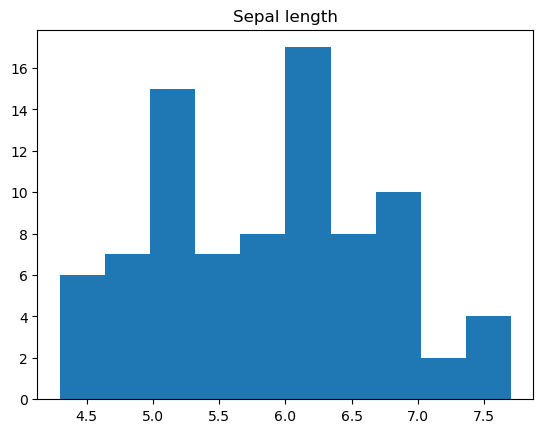

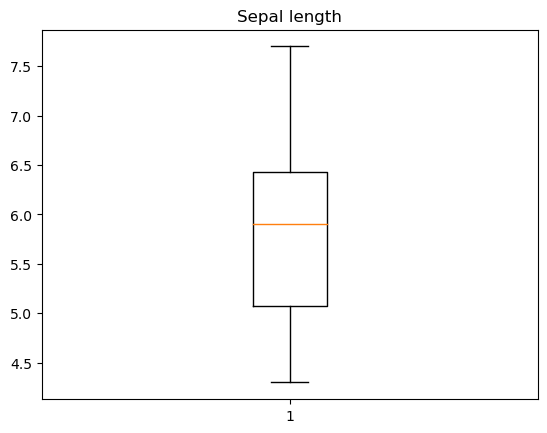

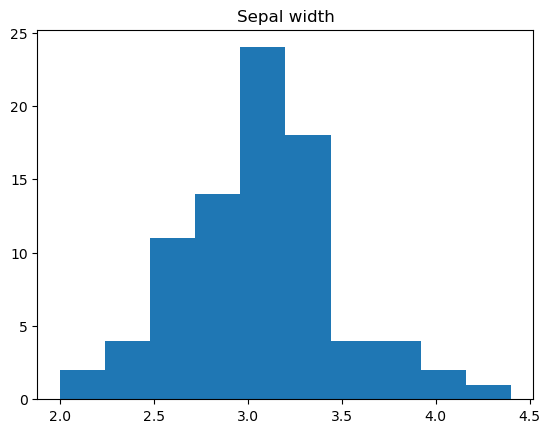

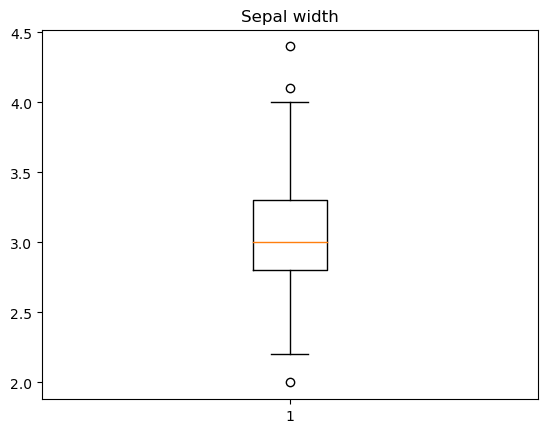

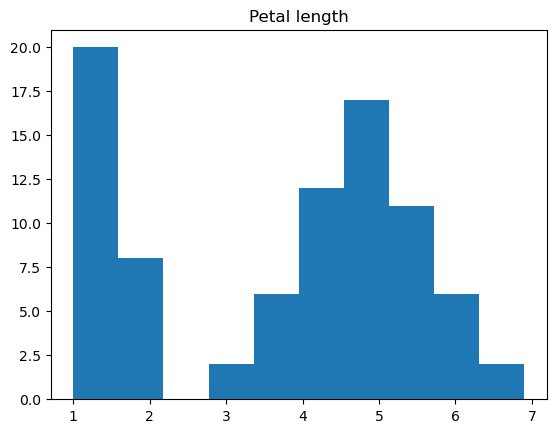

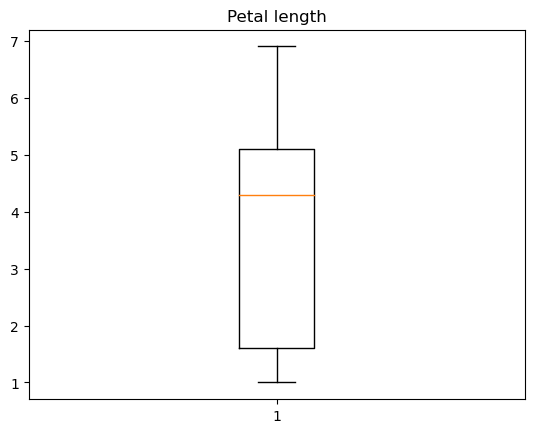

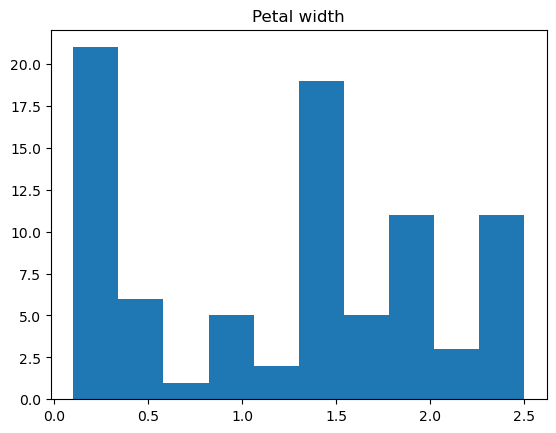

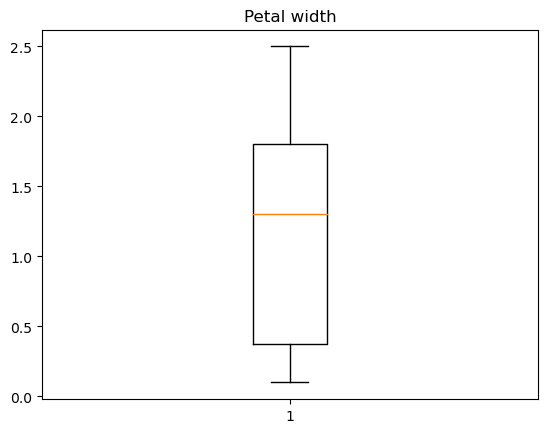

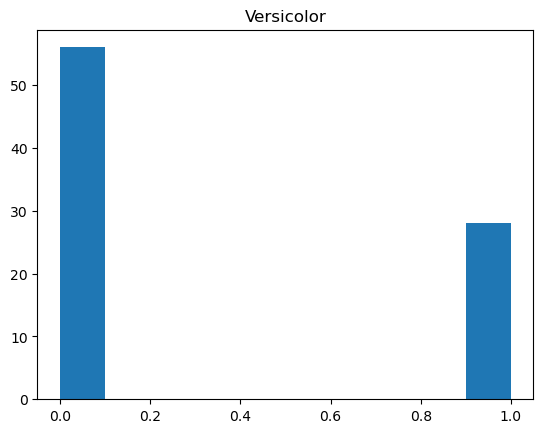

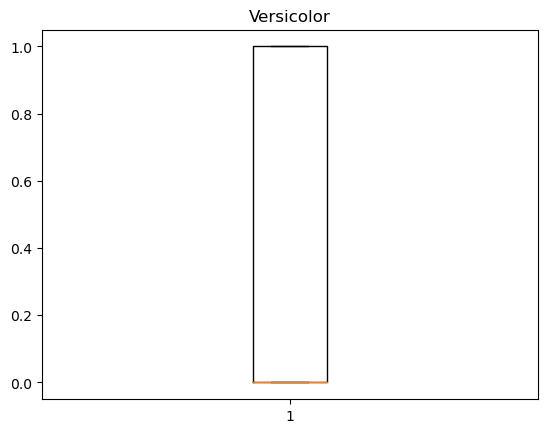

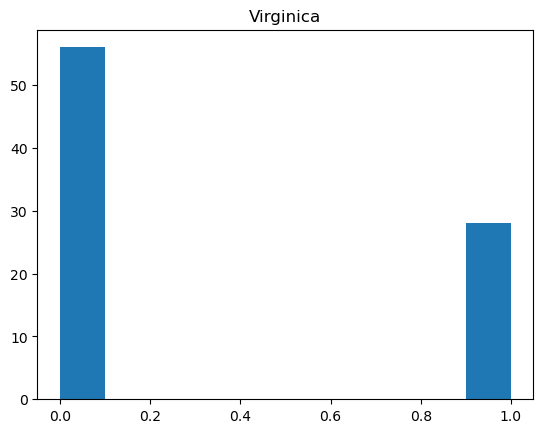

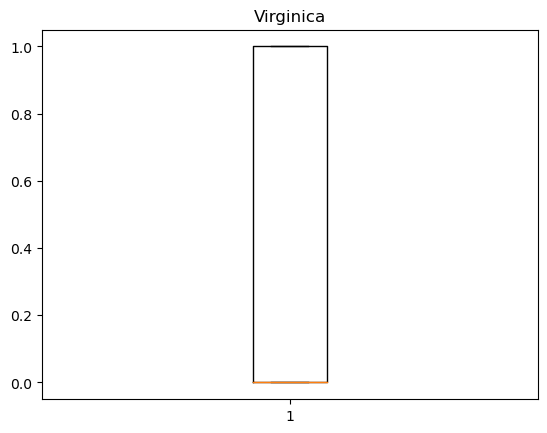

In [12]:
num_cols = train.columns[[train[col].dtype != 'object' for col in train.columns]]
for col in num_cols:
    #use matplotlib to create a histogram
    #alt formatting: calling train[col].hist()
    plt.hist(train[col])
    # make a title, cleaned up a little with string methods
    plt.title(col.replace('_',' ').capitalize())
    #call plt.show so we have separate visualizations
    plt.show()
    # use matplotlib to create a boxplot
    plt.boxplot(train[col])
    # use the same string methods to clean up the title
    plt.title(col.replace('_',' ').capitalize())
    plt.savefig(col + 'box.png')
    plt.show()

## 3. Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

- For each measurement type, compute the descriptive statistics for each species.

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

- Document takeaways & any actions.


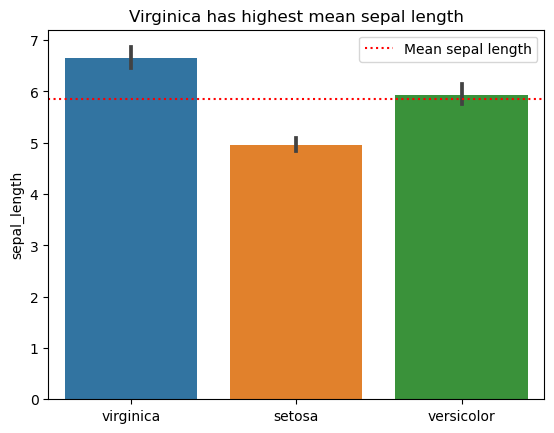

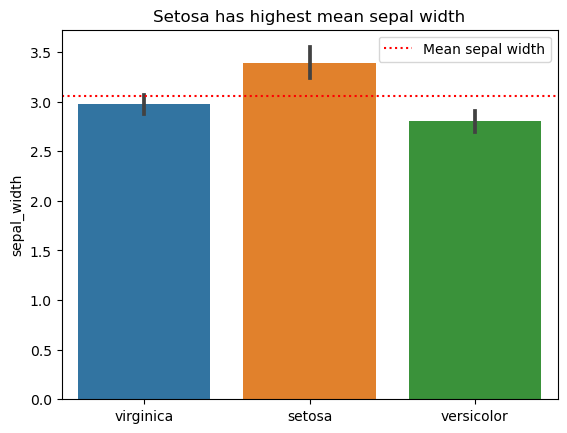

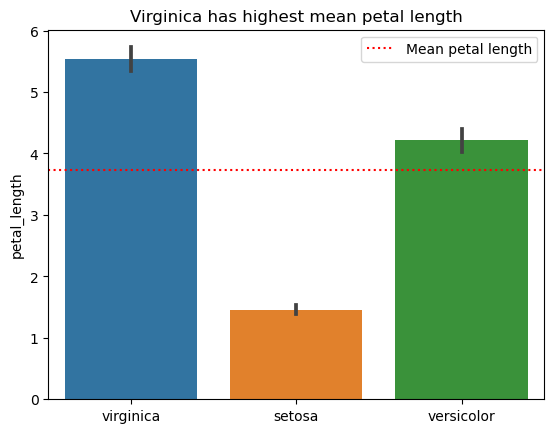

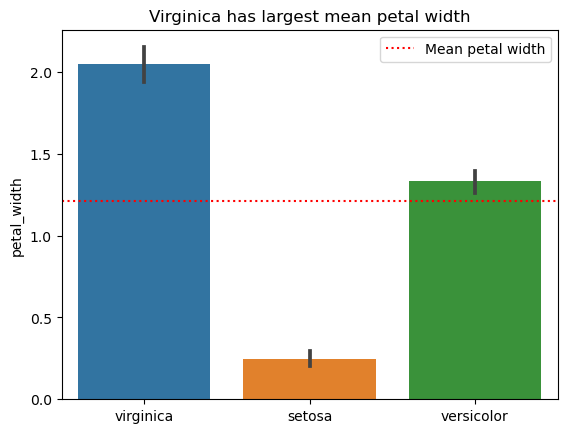

In [32]:
plt.title("Virginica has highest mean sepal length")
# calling seaborn for a bar plot, specifying species and sepal length
sns.barplot(x="species", y="sepal_length", data=train)
# annotate a mean of the sepal length
# calculating a mean of the sepal length (for *all* the species)
mean_sepal_length = train.sepal_length.mean()
# place the calculated mean as a horizontal axis line
plt.axhline(mean_sepal_length, label="Mean sepal length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

# change sepal length to sepal width, run same process
plt.title("Setosa has highest mean sepal width")
sns.barplot(x="species", y="sepal_width", data=train)
mean_sepal_width = train.sepal_width.mean()
plt.axhline(mean_sepal_width, label="Mean sepal width", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()


plt.title("Virginica has highest mean petal length")
sns.barplot(x="species", y="petal_length", data=train)
mean_petal_length = train.petal_length.mean()
plt.axhline(mean_petal_length, label="Mean petal length", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()


plt.title("Virginica has largest mean petal width")
sns.barplot(x="species", y="petal_width", data=train)
mean_petal_width = train.petal_width.mean()
plt.axhline(mean_petal_width, label="Mean petal width", color='red', linestyle='dotted')
plt.xlabel('')
plt.legend()
plt.show()

# Virginica descriptive statistics
# train, where train.species is virginica
train[train.species == 'virginica'].describe()

# Setosa descriptive statistics
train[train.species == 'setosa'].describe()


# Versicolor descriptive statistics
train[train.species == 'versicolor'].describe()

alpha = 0.05

In [14]:
# virginica = train, where train's species is virginica
virginica = train[train.species == 'virginica']
# again, for versicolor
versicolor = train[train.species == 'versicolor']
# again, for setosa
setosa = train[train.species == 'setosa']
# establish a one-tailed test using a kwarg in mannwhitney
t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, 
                          alternative="greater")
t, p

(768.5, 2.982389808696449e-10)

In [15]:
test_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in test_var:
    t, p = t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="greater")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)
    print('------------------')
    print('\n')

Comparing sepal_length between virginica and versicolor
652.0 1.0119920315840621e-05
------------------


Comparing sepal_width between virginica and versicolor
534.0 0.009508012794926874
------------------


Comparing petal_length between virginica and versicolor
771.5 2.5253450566492905e-10
------------------


Comparing petal_width between virginica and versicolor
768.5 2.982389808696449e-10
------------------




## 4. Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

- Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions.

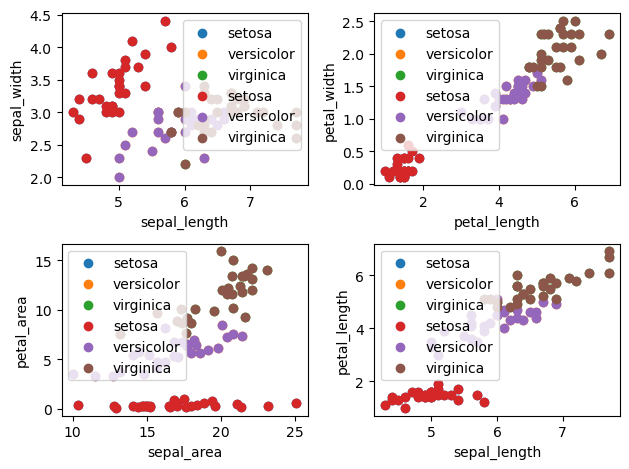

In [16]:
train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train['petal_length'] * train['petal_width']

import itertools


list(itertools.combinations(train.drop(columns='species').columns, 2))

# define feature combinations with a list of tuples
combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area', 'petal_area'),
    ('sepal_length', 'petal_length')
]

combos[0]

# we can use aggretations to examine specific stats on our categorical target
train.groupby('species')['sepal_area'].sum()

x = combos[0][0]
y = combos[0][1]
def scatter_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()
        
# test it with one plot
scatter_species(x,y)

plt.subplot(2,2,1)
scatter_species(combos[0][0], combos[0][1])
plt.subplot(2,2,2)
scatter_species(combos[1][0], combos[1][1])
plt.subplot(2,2,3)
scatter_species(combos[2][0], combos[2][1])
plt.subplot(2,2,4)
scatter_species(combos[3][0], combos[3][1])
plt.tight_layout()

for i, pair in enumerate(combos):
    plt.subplot(2,2,i+1)
    scatter_species(pair[0], pair[1])

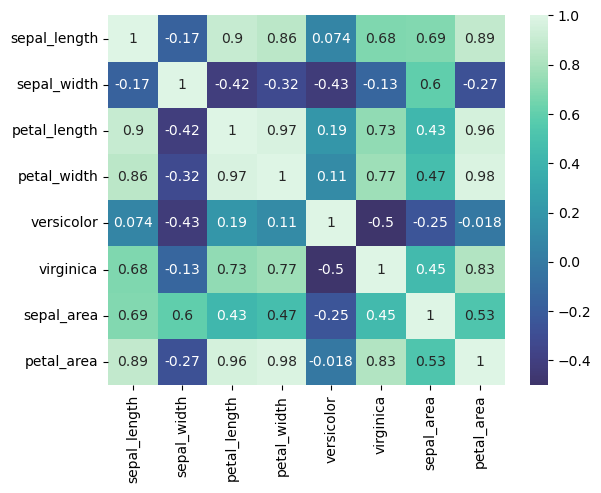

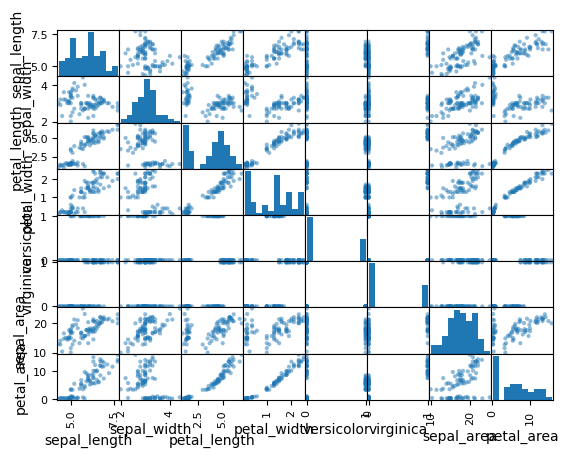

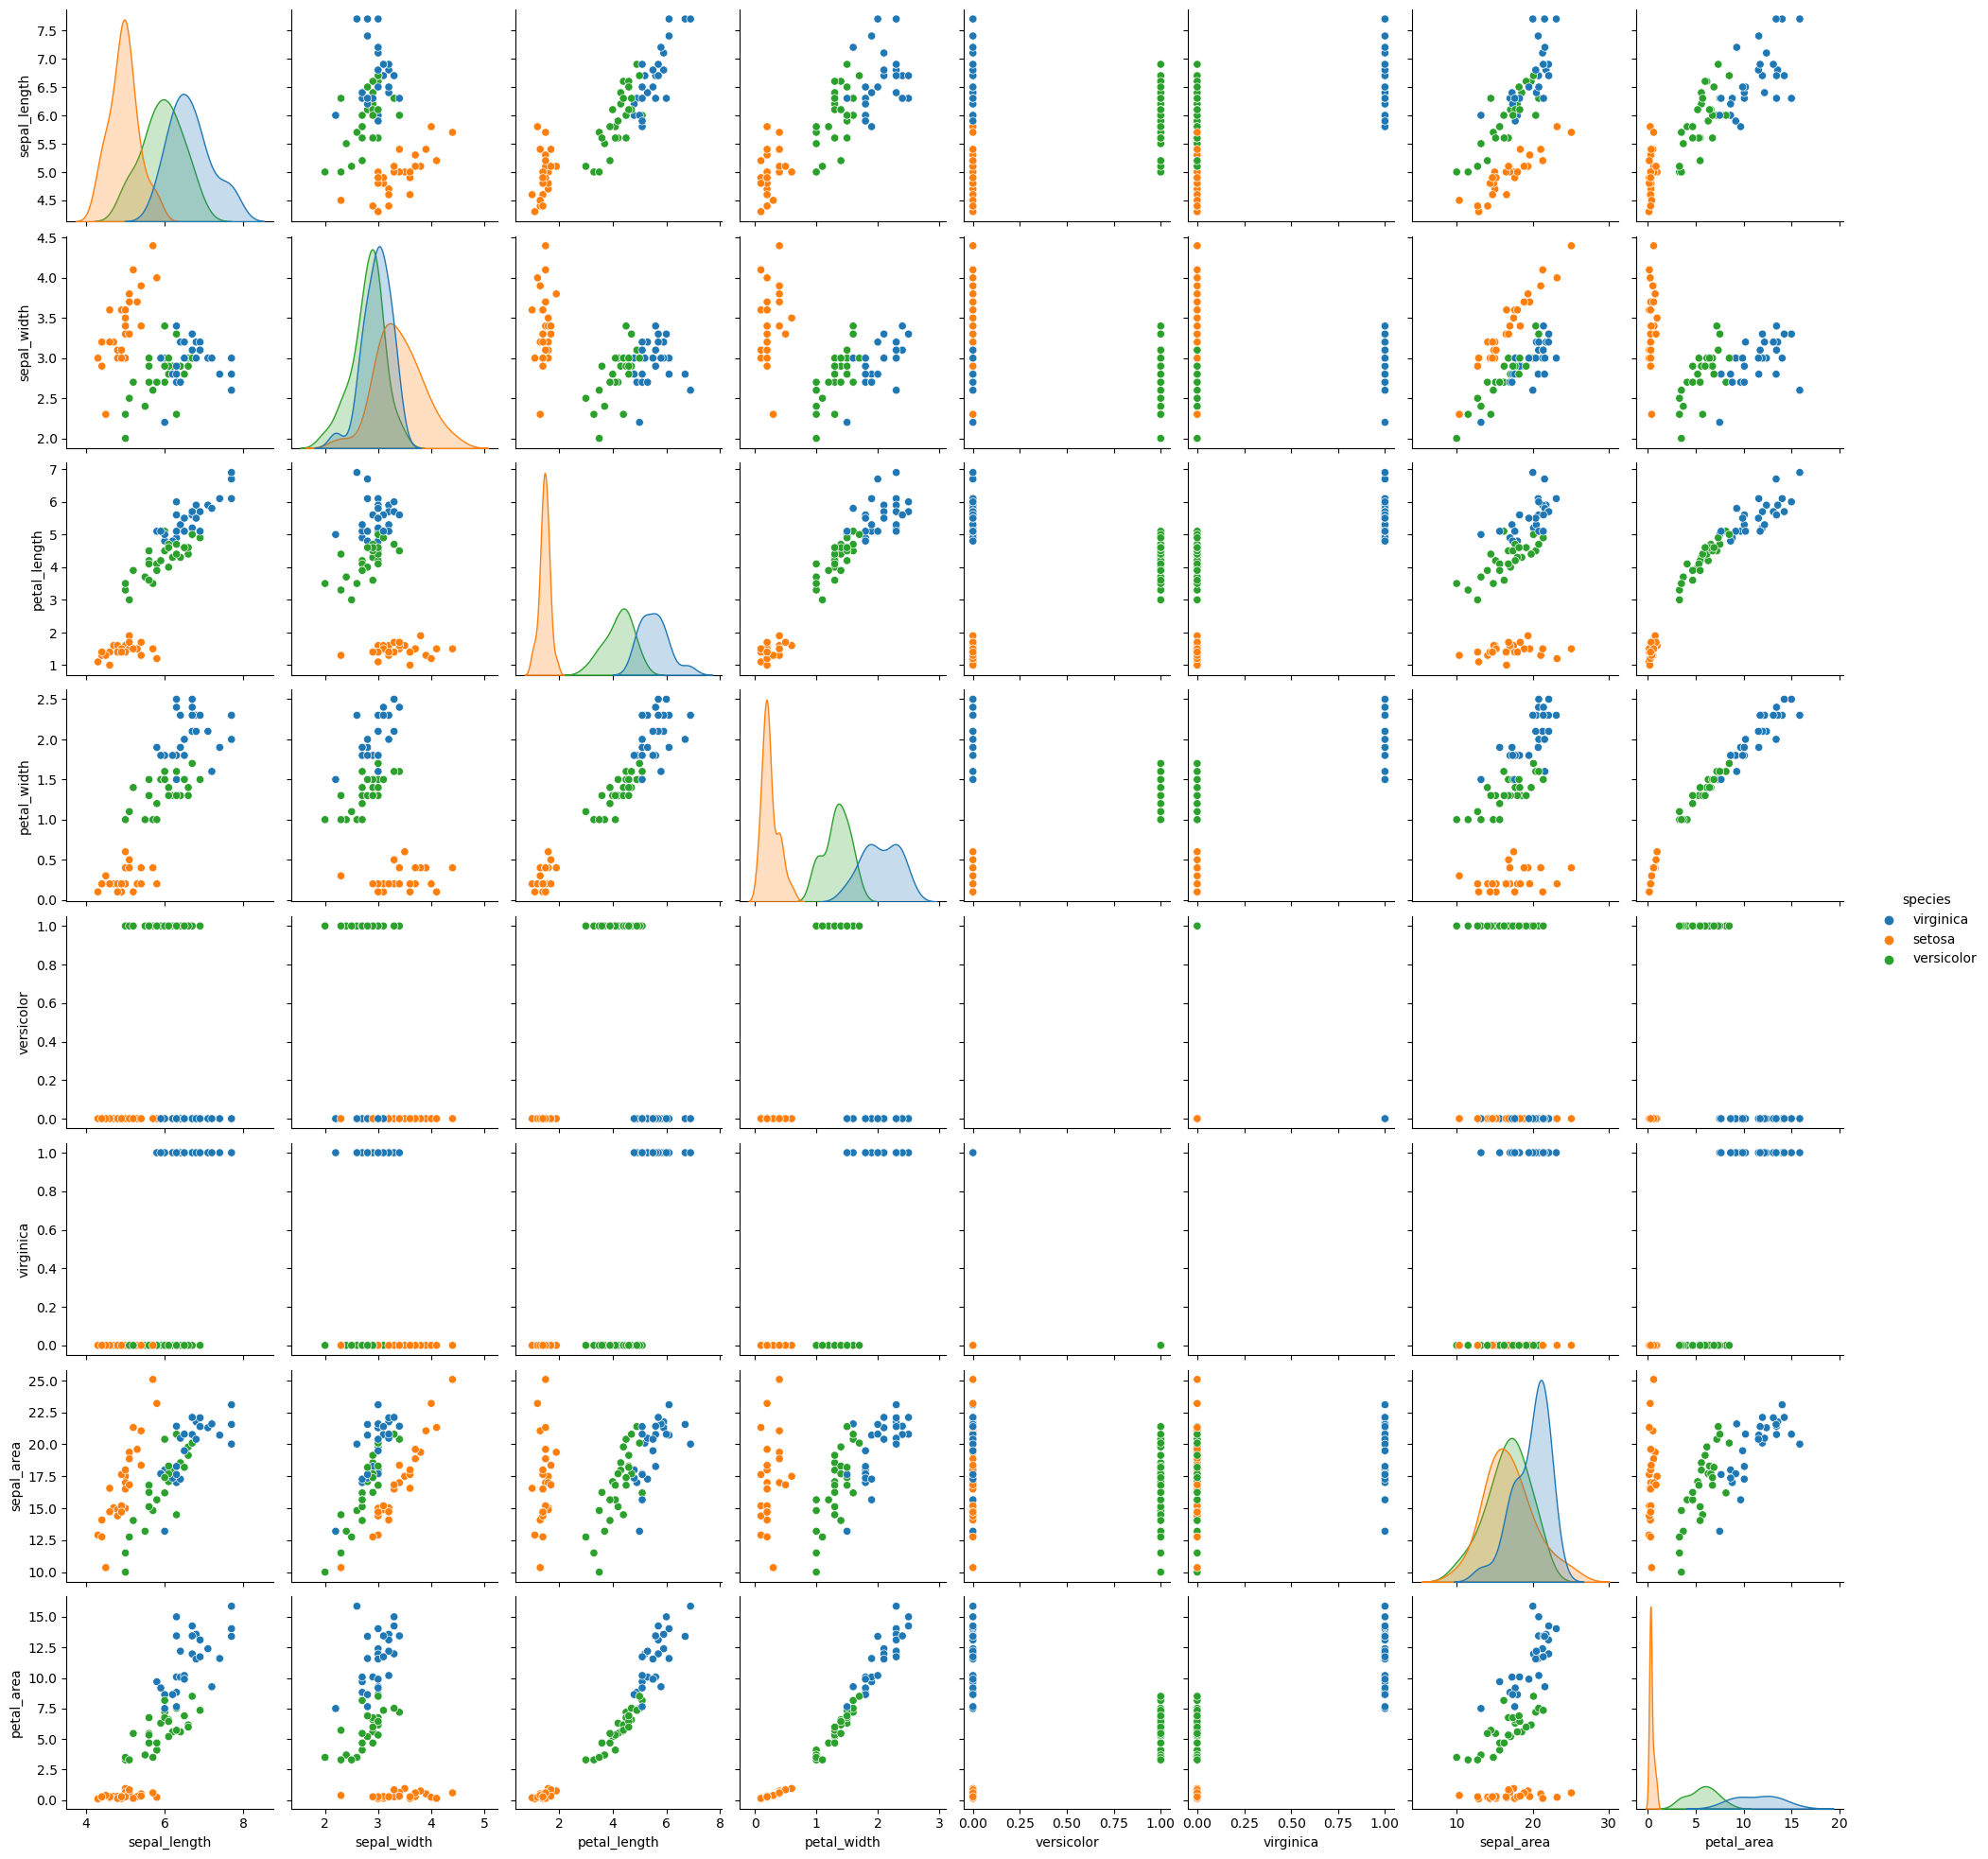

In [17]:
train.corr()
sns.heatmap(train.corr(), cmap='mako', center=0, annot=True)
plt.show()


pd.plotting.scatter_matrix(train)
plt.show()

sns.pairplot(train, hue='species')
plt.show()

# Part II

Explore your titanic dataset more completely.

- Determine drivers of the target variable
- Determine if certain columns should be dropped
- Determine if it would be valuable to bin some numeric columns
- Determine if it would be valuable to combine multiple columns into one.

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [43]:
titanic = acquire.get_titanic_data()

In [44]:
titanic

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [50]:
df_titanic = pd.read_csv('titanic_df.csv')

In [51]:
df_titanic

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


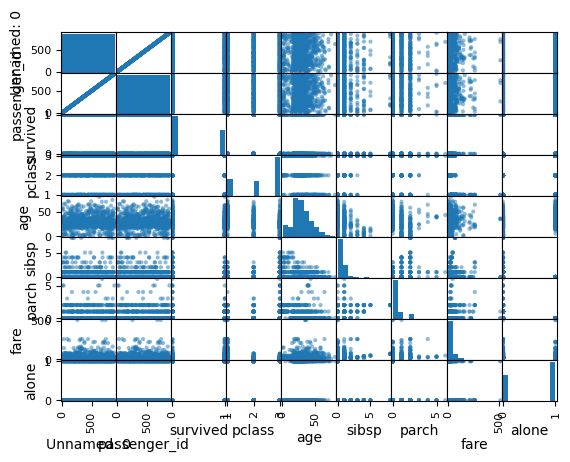

In [53]:
pd.plotting.scatter_matrix(df_titanic)
plt.show()




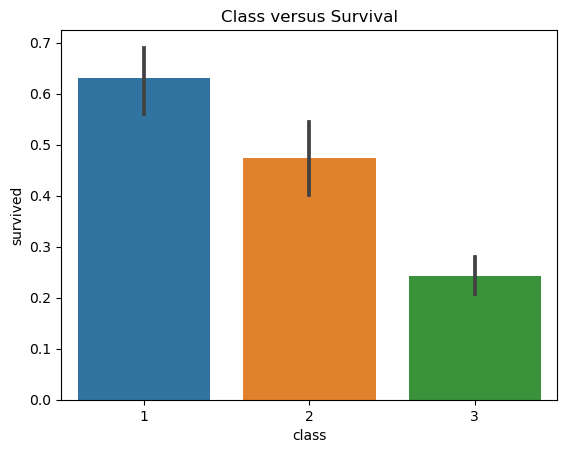

In [57]:
# which class had the best chance of survival

plt.title("Class versus Survival")
sns.barplot(x="pclass", y="survived", data=titanic)
plt.xlabel('class')
plt.ylabel('survived')
plt.show()


In [ ]:
# it looks like first class was more likely to survive than the other classes.

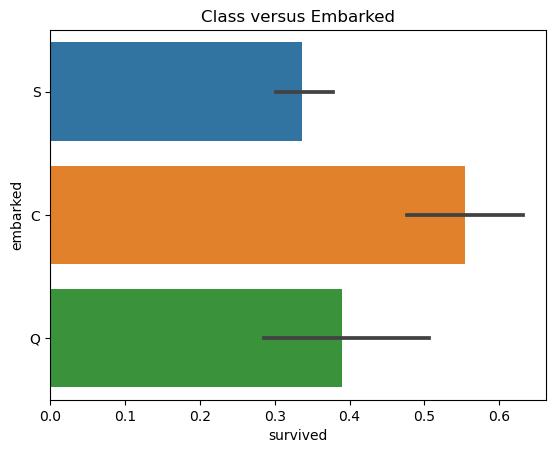

In [63]:
plt.title("Class versus Embarked")
sns.barplot(x="survived", y="embarked", data=titanic)
plt.xlabel('survived')
plt.ylabel('embarked')
plt.show()

In [ ]:
# Cherbourg had the highest survuval rating

<AxesSubplot:xlabel='pclass', ylabel='survived'>

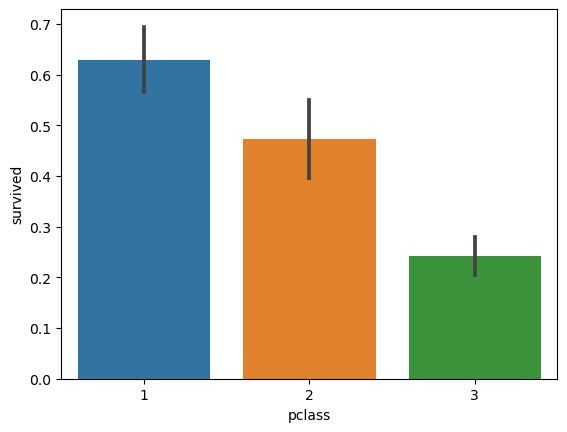

In [71]:
sns.barplot(data=df_titanic, x='pclass', y='survived')


In [ ]:
#  1st pclass had the greatest chance of survival compared to the other classes

<AxesSubplot:xlabel='pclass', ylabel='survived'>

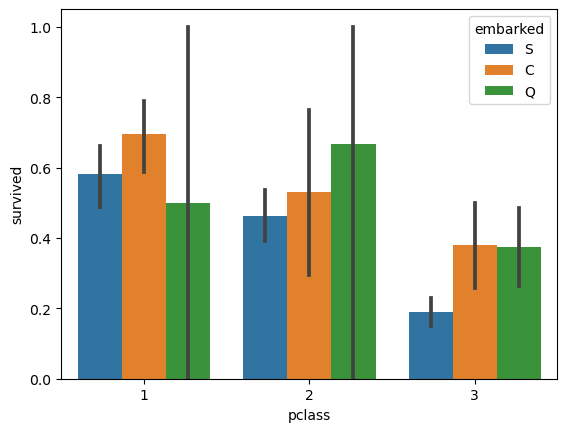

In [61]:
# plotting survival rating by pclass of embarked. I want to know what is the survival chance for 
# each class of embarked.

sns.barplot(data=df_titanic, x='pclass', y='survived', hue='embarked')


# Cherbourgs most common survival pclass is 1st
# Queenstown most common survival pclass is 2nd
# Southampton most common survival pclass is 1st


H$_0$ : there is no association between pclass and survival

H$_a: there is a association between pclass and survival

In [78]:
observed = pd.crosstab(df_titanic.pclass, df_titanic.survived)
observed

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


In [79]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p

(102.88898875696056, 4.549251711298793e-23)

In [81]:
α = 0.05

In [82]:
p < α

True

We canreject the null hypothesis that there is no association between pclass and servival

 